# Tarea 2
## Regresion Lineal y Logistica 

### DataSet
* dataset de vuelos de argentina
* url: https://datos.gob.ar/dataset/transporte-aterrizajes-despegues-procesados-por-administracion-nacional-aviacion-civil-anac
* Seleccionar solo un año


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
import sympy as sym


In [39]:
vuelos_argentina = pd.read_excel('Dataset/2023-2.xlsx')

vuelos_argentina


,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato
0,2023-01-01,00:01:00,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,199,199,DEFINITIVO
1,2023-01-01,00:10:00,Regular,Doméstico,Despegue,IGU,EZE,JETSMART AIRLINES S.A.,AIB-A320-232,67,34,DEFINITIVO
2,2023-01-01,00:15:00,Regular,Internacional,Aterrizaje,AER,SBPA,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,36,36,DEFINITIVO
3,2023-01-01,00:17:00,Regular,Doméstico,Aterrizaje,SAL,AER,JETSMART AIRLINES S.A.,AIB-A320-232,168,84,DEFINITIVO
4,2023-01-01,00:19:00,Regular,Doméstico,Aterrizaje,AER,OSA,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,17,9,DEFINITIVO
...,...,...,...,...,...,...,...,...,...,...,...,...
557147,2023-12-31,23:45:00,Trabajo Aéreo,Doméstico,Aterrizaje,DOZ,SRA,0,PA-PA-31-T,0,0,DEFINITIVO
557148,2023-12-31,23:50:00,Regular,Doméstico,Despegue,AER,CBA,JETSMART AIRLINES S.A.,AIB-A320-232,174,87,DEFINITIVO
557149,2023-12-31,23:51:00,Regular,Doméstico,Despegue,NEU,AER,JETSMART AIRLINES S.A.,AIB-A320-232,143,72,DEFINITIVO
557150,2023-12-31,23:55:00,Regular,Doméstico,Despegue,AER,CBA,AEROLINEAS ARGENTINAS SA,BO-B737-800,166,83,DEFINITIVO


In [43]:
# Limpiar los datos (manejar valores faltantes, duplicados, etc.)
vuelos_argentina.dropna(inplace=True)
vuelos_argentina.drop_duplicates(inplace=True)




In [45]:
# Convertir 'Fecha UTC' a datetime y 'Hora UTC' a timedelta
vuelos_argentina['Fecha UTC'] = pd.to_datetime(vuelos_argentina['Fecha UTC'])

# Convertir 'Hora UTC' a timedelta
vuelos_argentina['Hora UTC'] = vuelos_argentina['Hora UTC'].apply(lambda x: pd.Timedelta(hours=x.hour, minutes=x.minute))

# Sumar 'Fecha UTC' y 'Hora UTC' para tener una columna completa de datetime
vuelos_argentina['Fecha Hora'] = vuelos_argentina['Fecha UTC'] + vuelos_argentina['Hora UTC']

AttributeError: 'Timedelta' object has no attribute 'hour'

In [20]:
# Seleccionar solo columnas numéricas para el análisis de correlación
numeric_columns = vuelos_argentina.select_dtypes(include=[np.number])

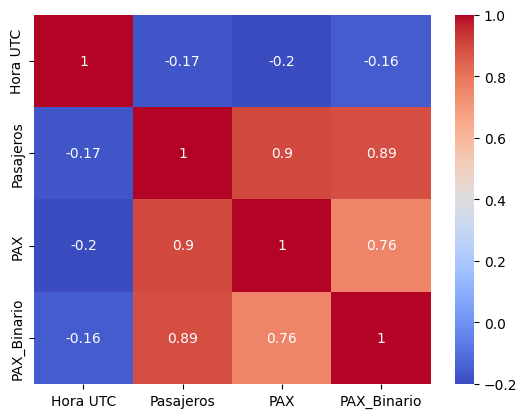

In [21]:
# Análisis de correlación
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [44]:
vuelos_argentina

,Fecha UTC,Hora UTC,Clase de Vuelo (todos los vuelos),Clasificación Vuelo,Tipo de Movimiento,Aeropuerto,Origen / Destino,Aerolinea Nombre,Aeronave,Pasajeros,PAX,Calidad dato,Fecha Hora
0,2023-01-01,0 days 00:01:00,Regular,Internacional,Aterrizaje,EZE,LEMD,IBERIA - LINEAS AÉREAS DE ESPAÑA,0,199,199,DEFINITIVO,2023-01-01 00:01:00
1,2023-01-01,0 days 00:10:00,Regular,Doméstico,Despegue,IGU,EZE,JETSMART AIRLINES S.A.,AIB-A320-232,67,34,DEFINITIVO,2023-01-01 00:10:00
2,2023-01-01,0 days 00:15:00,Regular,Internacional,Aterrizaje,AER,SBPA,AEROLINEAS ARGENTINAS SA,BO-B-737-76N,36,36,DEFINITIVO,2023-01-01 00:15:00
3,2023-01-01,0 days 00:17:00,Regular,Doméstico,Aterrizaje,SAL,AER,JETSMART AIRLINES S.A.,AIB-A320-232,168,84,DEFINITIVO,2023-01-01 00:17:00
4,2023-01-01,0 days 00:19:00,Regular,Doméstico,Aterrizaje,AER,OSA,AEROLINEAS ARGENTINAS SA,EMB-ERJ190100IGW,17,9,DEFINITIVO,2023-01-01 00:19:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
557147,2023-12-31,0 days 23:45:00,Trabajo Aéreo,Doméstico,Aterrizaje,DOZ,SRA,0,PA-PA-31-T,0,0,DEFINITIVO,2023-12-31 23:45:00
557148,2023-12-31,0 days 23:50:00,Regular,Doméstico,Despegue,AER,CBA,JETSMART AIRLINES S.A.,AIB-A320-232,174,87,DEFINITIVO,2023-12-31 23:50:00
557149,2023-12-31,0 days 23:51:00,Regular,Doméstico,Despegue,NEU,AER,JETSMART AIRLINES S.A.,AIB-A320-232,143,72,DEFINITIVO,2023-12-31 23:51:00
557150,2023-12-31,0 days 23:55:00,Regular,Doméstico,Despegue,AER,CBA,AEROLINEAS ARGENTINAS SA,BO-B737-800,166,83,DEFINITIVO,2023-12-31 23:55:00


In [24]:
# Selección de variables para la predicción (Regresión Lineal)
features = ['Pasajeros']  # Puedes agregar más características relevantes
target = 'PAX'

X = vuelos_argentina[features]
y = vuelos_argentina[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 676.0029543846816


Error cuadrático medio (MSE): 622.4302445706278
                                                    Coeficiente
Pasajeros                                              0.833072
Clase de Vuelo (todos los vuelos)_Regular            -27.162149
Clase de Vuelo (todos los vuelos)_Trabajo Aéreo        0.838335
Clase de Vuelo (todos los vuelos)_Vuelo Escuela        0.852503
Clase de Vuelo (todos los vuelos)_Vuelo Oficial...     0.743284
Clase de Vuelo (todos los vuelos)_Vuelo Oficial...     0.371927
Clase de Vuelo (todos los vuelos)_Vuelo Privado...     1.071334
Clase de Vuelo (todos los vuelos)_Vuelo Privado...     0.701652
Clase de Vuelo (todos los vuelos)_Vuelo de Adie...     0.803452


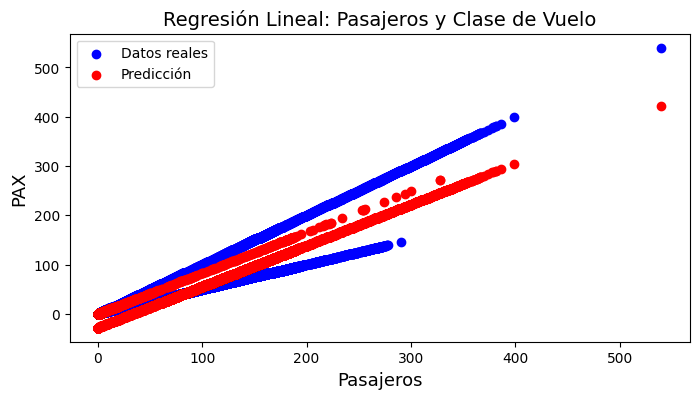

In [46]:
# Convertir la columna 'Clase de Vuelo (todos los vuelos)' en variables dummy
vuelos_argentina = pd.get_dummies(vuelos_argentina, columns=['Clase de Vuelo (todos los vuelos)'], drop_first=True)

# Selección de variables para la predicción (Pasajeros y las variables dummy de Clase de Vuelo)
features = ['Pasajeros'] + [col for col in vuelos_argentina.columns if 'Clase de Vuelo (todos los vuelos)_' in col]
target = 'PAX'

X = vuelos_argentina[features]
y = vuelos_argentina[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

# Extraer los coeficientes del modelo
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeficiente'])
print(coefficients)

# Graficar las predicciones en comparación con los datos reales
plt.figure(figsize=(8, 4))
plt.scatter(X_test['Pasajeros'], y_test, color='blue', label='Datos reales')
plt.scatter(X_test['Pasajeros'], y_pred, color='red', label='Predicción')
plt.title("Regresión Lineal: Pasajeros y Clase de Vuelo", fontsize=14.0)
plt.xlabel("Pasajeros", fontsize=13.0)
plt.ylabel("PAX", fontsize=13.0)
plt.legend()
plt.show()

In [48]:
# Modelo de Regresión Logística (clasificación)
# Transformar el target en una variable categórica binaria
vuelos_argentina['PAX_Binario'] = (vuelos_argentina['PAX'] > vuelos_argentina['PAX'].median()).astype(int)
y_binario = vuelos_argentina['PAX_Binario']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binario, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)

y_pred_class = log_reg.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred_class)
print(f'Precisión del modelo de clasificación: {accuracy}')

Precisión del modelo de clasificación: 0.980633217402245


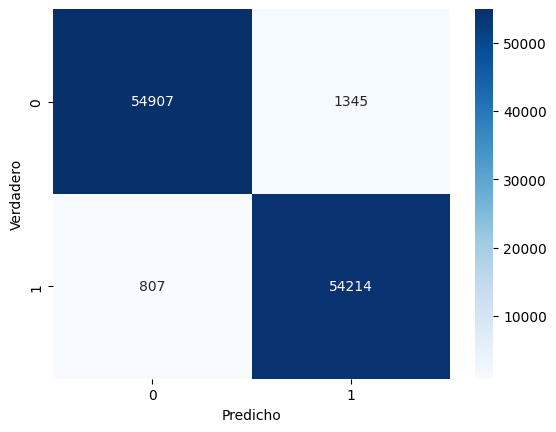

Tipo de Movimiento   Aterrizaje  Despegue
Clasificación Vuelo                      
Doméstico                225758    228780
Internacional             50137     51688


In [47]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_bin, y_pred_class)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.show()

# Tablas de Contingencia
contingency_table = pd.crosstab(vuelos_argentina['Clasificación Vuelo'], vuelos_argentina['Tipo de Movimiento'])
print(contingency_table)

In [12]:
# Modelo de Regresión Logística (clasificación)
# Transformar el target en una variable categórica binaria
vuelos_argentina['PAX_Binario'] = (vuelos_argentina['PAX'] > vuelos_argentina['PAX'].median()).astype(int)
y_binario = vuelos_argentina['PAX_Binario']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binario, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)

y_pred_class = log_reg.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, y_pred_class)
print(f'Precisión del modelo de clasificación: {accuracy}')

Precisión del modelo de clasificación: 0.9806601781204785


In [19]:
# Definir el orden de las categorías
orden = ['No Regular', 'Regular', 'Trabajo Aéreo', 'Vuelo de Adiestramiento', 'Vuelo Escuela', 'Vuelo Oficial Extranjero', 'Vuelo Oficial Nacional', 'Vuelo Privado con Matrícula Extranjera', 'Vuelo Privado con Matrícula Nacional']

# Mapear las categorías a números utilizando el nombre correcto de la columna
argentina['codificacion_clase_vuelos'] = argentina['Clase de Vuelo (todos los vuelos)'].map({cat: idx for idx, cat in enumerate(orden)})

argentina

        Fecha UTC  Hora UTC Clase de Vuelo (todos los vuelos)  \
18     2023-01-01  00:44:00                        No Regular   
42     2023-01-01  01:55:00                        No Regular   
103    2023-01-01  08:40:00                        No Regular   
126    2023-01-01  10:00:00                        No Regular   
165    2023-01-01  11:17:00                        No Regular   
...           ...       ...                               ...   
556942 2023-12-31  20:08:00                        No Regular   
556991 2023-12-31  20:53:00                        No Regular   
556994 2023-12-31  20:53:00                        No Regular   
557056 2023-12-31  21:58:00                        No Regular   
557085 2023-12-31  22:30:00                        No Regular   

       Clasificación Vuelo Tipo de Movimiento Aeropuerto Origen / Destino  \
18               Doméstico         Aterrizaje        FDO              TUC   
42           Internacional         Aterrizaje        EZE         

## Petitorio

* Realizar un analisis y descripcion de los datos
* Limpiar los datos de ser necesario
* Realizar una prediccion utilizandon la regresion lineal
* Realizar una prediccion o clasificacion con el metodo de regresion logistica
* Para las predicciones puede utilizar las variables que el equipo seleccione
##### Investigacion -> sobre tablas de contingencia 

### Presentar

* Presentar un informe con capturas y conclusiones de los hallazgos
* conclusiones sobre los modelos entrenados(score,tablas de contingencias,mejor porcentaje de Dataset de entrenamiento y pruebas)
* Formato .pdf, incluir los nombres de los integrantes del grupo
